In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [5]:
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt > /tmp/irish-lyrics.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 68970  100 68970    0     0  2322k      0 --:--:-- --:--:-- --:--:-- 2322k


In [9]:
tokenizer = Tokenizer()

data= open('/tmp/irish-lyrics.txt').read()

corpus  = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
print(total_words)

2690


In [10]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [11]:
# Pad sequences

max_sequence_len = max([len(x) for  x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [12]:
# create predictors and label

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [13]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [14]:
# converted word predictions to categorical using one hot encoding
print(xs[6],ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2] [0. 0. 0. ... 0. 0. 0.]


In [15]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [16]:
model = Sequential([
    Embedding(total_words, 128, input_length=max_sequence_len-1),
    Bidirectional(LSTM(150)),
    Dense(total_words, activation='softmax') # since we've done one hot encoding, output neurons have to be equivalent to total_words
])

In [19]:
from tensorflow.keras.optimizers import Adam

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [21]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 3s 8ms/step - loss: 6.6507 - accuracy: 0.0736
Epoch 2/100
377/377 [==============================] - 3s 8ms/step - loss: 5.7380 - accuracy: 0.1183
Epoch 3/100
377/377 [==============================] - 3s 8ms/step - loss: 4.8302 - accuracy: 0.1697
Epoch 4/100
377/377 [==============================] - 3s 8ms/step - loss: 3.9081 - accuracy: 0.2429
Epoch 5/100
377/377 [==============================] - 3s 8ms/step - loss: 3.0786 - accuracy: 0.3503
Epoch 6/100
377/377 [==============================] - 3s 8ms/step - loss: 2.4383 - accuracy: 0.4520
Epoch 7/100
377/377 [==============================] - 3s 8ms/step - loss: 2.0311 - accuracy: 0.5267
Epoch 8/100
377/377 [==============================] - 3s 8ms/step - loss: 1.6793 - accuracy: 0.5975
Epoch 9/100
377/377 [==============================] - 3s 8ms/step - loss: 1.4318 - accuracy: 0.6588
Epoch 10/100
377/377 [==============================] - 3s 8ms/step - loss: 1.2621 - accura

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

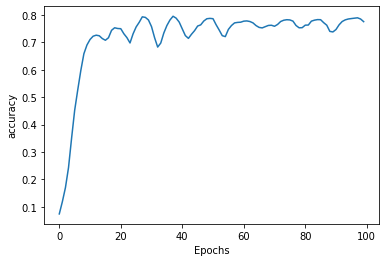

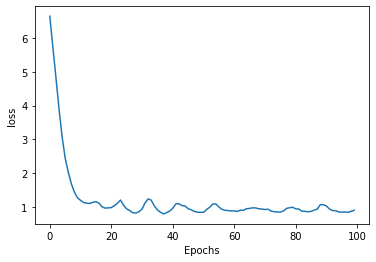

In [23]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


In [39]:
seed_text = "I've got a bad feeling about this"
next_words = 100

In [40]:
inverted_word_index = dict(list((value,key) for key,value in tokenizer.word_index.items()))

In [41]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = inverted_word_index[predicted[0]]
    seed_text += ' ' + output_word
print(seed_text)

I've got a bad feeling about this high road with my bag eye down the street on raked and rambling to ireland to change the linnet too late at night hes stationed trod of green went twas gone away waiting mother ill not be in again thou mothers so together shaken far away oer the grand land or night host turning out his money did me deny day or in prison coo his body graceful as their blood said she still love well care build ill love upon the street fair of spancil hill at back paddy take today again if the return so fondly today with
